In [7]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import warnings
import yfinance as yf
import seaborn as sns; sns.set()
yf.pdr_override()
%matplotlib inline
warnings.filterwarnings('ignore')

In [31]:
stocks = [CMCSA', '^GSPC']
start  = datetime.datetime(2016,1,1)
end = datetime.datetime(2021,4,1)
stock_prices = yf.download(stocks, start=start, end = end, interval = '1mo')

[*********************100%***********************]  2 of 2 completed


In [32]:
stock_prices.head()

Adj Close                   Close                    High  \
                CMCSA        ^GSPC      CMCSA        ^GSPC      CMCSA   
Date                                                                    
2016-01-01  25.049784  1940.239990  27.855000  1940.239990  28.025000   
2016-01-04        NaN          NaN        NaN          NaN        NaN   
2016-02-01  26.073593  1932.229980  28.865000  1932.229980  29.850000   
2016-03-01  27.586607  2059.739990  30.540001  2059.739990  30.684999   
2016-04-01  27.442080  2065.300049  30.379999  2065.300049  31.455000   

                               Low                    Open               \
                  ^GSPC      CMCSA        ^GSPC      CMCSA        ^GSPC   
Date                                                                      
2016-01-01  2038.199951  26.170000  1812.290039  27.575001  2038.199951   
2016-01-04          NaN        NaN          NaN        NaN          NaN   
2016-02-01  1962.959961  27.190001  1810.099976  27.535000  1936.939941   
2016-03-01  2072.209961  29.025000  1937.089966  29.115000  1937.089966   
2016-04-01  2111.050049  30.010000  2033.800049  30.295000  2056.620117   

                 Volume                
                  CMCSA         ^GSPC  
Date                                   
2016-01-01  532587400.0  9.240977e+10  
2016-01-04          NaN           NaN  
2016-02-01  608842000.0  9.304956e+10  
2016-03-01  400644600.0  9.263942e+10  
2016-04-01  425409600.0  8.112499e+10

In [33]:
print(stock_prices.columns.to_list())

[('Adj Close', 'CMCSA'), ('Adj Close', '^GSPC'), ('Close', 'CMCSA'), ('Close', '^GSPC'), ('High', 'CMCSA'), ('High', '^GSPC'), ('Low', 'CMCSA'), ('Low', '^GSPC'), ('Open', 'CMCSA'), ('Open', '^GSPC'), ('Volume', 'CMCSA'), ('Volume', '^GSPC')]


In [34]:
stock_prices = stock_prices['Close']
stock_prices.dropna(inplace = True)

In [37]:
returns=stock_prices.pct_change()
returns.dropna(inplace=True)
returns.head()

,CMCSA,^GSPC
Date,,
2016-02-01,0.036259,-0.004128
2016-03-01,0.058029,0.065991
2016-04-01,-0.005239,0.002699
2016-05-01,0.041804,0.015325
2016-06-01,0.029858,0.000911


In [39]:
pip install fredapi

In [49]:
from fredapi import Fred
fred = Fred(api_key = 'acd35d2ff34761fdd9507efcc9cd345f')

In [50]:
risk_free = fred.get_series('DGS3MO')
risk_free = risk_free['2016-01-01':'2021-04-01']
rf = risk_free/3

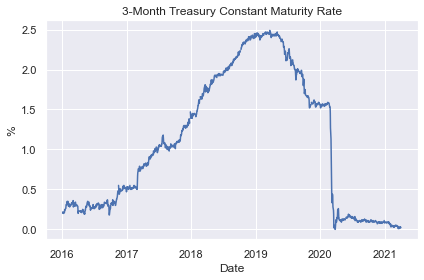

In [51]:
plt.plot(risk_free)
plt.xlabel('Date')
plt.ylabel('%')
plt.title('3-Month Treasury Constant Maturity Rate')
plt.tight_layout()
plt.show()

In [53]:
stocks = ['CMCSA', '^GSPC']
for i in stocks:
    returns['excess_return_'+str(i)] = returns[i] - rf
returns.head()

,CMCSA,^GSPC,excess_return_CMCSA,excess_return_^GSPC
Date,,,,
2016-02-01,0.036259,-0.004128,-0.080407,-0.120795
2016-03-01,0.058029,0.065991,-0.051971,-0.044009
2016-04-01,-0.005239,0.002699,-0.081906,-0.073967
2016-05-01,0.041804,0.015325,NaN,NaN
2016-06-01,0.029858,0.000911,-0.070142,-0.099089


In [58]:
import statsmodels.api as sm

In [165]:
print(returns.iloc[:,1])

Date
2016-05-01    0.080906
2016-06-01    0.050898
2016-07-01   -0.039886
2016-08-01    0.080119
2016-09-01   -0.167582
2016-10-01   -0.108911
2016-11-01    0.111111
2016-12-01    0.280000
2017-01-01   -0.179687
2017-02-01   -0.022222
2017-03-01    0.298701
2017-04-01   -0.087500
2017-05-01    0.065753
2017-06-01    0.048843
2017-07-01   -0.083333
2017-08-01    0.058823
2017-09-01    0.303030
2017-10-01    0.317830
2017-11-01    1.226228
2017-12-01    1.103704
2018-01-01   -0.515845
2018-02-01   -0.230545
2018-03-01   -0.374291
2018-04-01    0.090634
2018-05-01   -0.033241
2018-06-01   -0.091691
2018-07-01    0.023659
2018-08-01   -0.029276
2018-09-01   -0.420635
2018-10-01   -0.353425
2018-11-01   -0.211864
2018-12-01   -0.188172
2019-01-01    0.225166
2019-02-01    0.729730
2019-03-01    0.021875
2019-04-01    0.611621
2019-05-01   -0.385199
2019-06-01   -0.030864
2019-07-01   -0.299363
2019-08-01   -0.163636
2019-09-01   -0.032609
2019-10-01   -0.123596
2019-11-01   -0.108974
2019-1

In [61]:
returns.dropna(inplace = True)
y_cmsa = returns['excess_return_CMCSA']
x = returns['excess_return_^GSPC']
x=sm.add_constant(x, prepend = False)
CAPM_CMSA = sm.OLS(y_cmsa, x)
CAPM_results_CMSA = CAPM_CMSA.fit()

In [107]:
CAPM_results_CMSA.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     excess_return_CMCSA   R-squared:                       0.975
Model:                             OLS   Adj. R-squared:                  0.975
Method:                  Least Squares   F-statistic:                     1576.
Date:                 Tue, 27 Apr 2021   Prob (F-statistic):           9.51e-34
Time:                         22:49:00   Log-Likelihood:                 69.362
No. Observations:                   42   AIC:                            -134.7
Df Residuals:                       40   BIC:                            -131.2
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
excess_return_^GSPC     0.9717      0.024     39.693      0.000       0.922       1.021
const                  -0.0059      0.011     -0.549      0.586      -0.028       0.016
==============================================================================
Omnibus:                        2.072   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.105
Skew:                           0.204   Prob(JB):                        0.576
Kurtosis:                       3.682   Cond. No.                         3.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [162]:
def get_coef_table(CAPM_results_CMSA):
        err_series = CAPM_results_CMSA.params - CAPM_results_CMSA.conf_int()[0]
        coef_df = pd.DataFrame({'coef': CAPM_results_CMSA.params.values[0:],
                                'pvalue':CAPM_results_CMSA.pvalues.round(5).values[0:]})
        return coef_df
print(get_coef_table(CAPM_results_CMSA))

       coef  pvalue
0  0.971705  0.0000
1 -0.005895  0.5859


In [168]:
stocks2 = ['ETH-USD','RIOT','CMCSA', '^GSPC']
start2  = datetime.datetime(2016,1,1)
end2 = datetime.datetime(2021,4,1)
stock_prices2 = yf.download(stocks2, start=start, end = end, interval = '1mo')

[*********************100%***********************]  4 of 4 completed


In [169]:
stock_prices2.head()

Adj Close                                       Close            \
                CMCSA   ETH-USD      RIOT        ^GSPC      CMCSA   ETH-USD   
Date                                                                          
2016-01-01  25.049784   2.30604       NaN  1940.239990  27.855000   2.30604   
2016-01-04        NaN       NaN       NaN          NaN        NaN       NaN   
2016-02-01  26.073593   6.33699       NaN  1932.229980  28.865000   6.33699   
2016-03-01  27.586607  11.40350       NaN  2059.739990  30.540001  11.40350   
2016-04-01  27.442080   8.81398  2.755584  2065.300049  30.379999   8.81398   

                                    High            ...   Low               \
            RIOT        ^GSPC      CMCSA   ETH-USD  ...  RIOT        ^GSPC   
Date                                                ...                      
2016-01-01   NaN  1940.239990  28.025000   2.83699  ...   NaN  1812.290039   
2016-01-04   NaN          NaN        NaN       NaN  ...   NaN          NaN   
2016-02-01   NaN  1932.229980  29.850000   6.64741  ...   NaN  1810.099976   
2016-03-01   NaN  2059.739990  30.684999  15.25710  ...   NaN  1937.089966   
2016-04-01  3.09  2065.300049  31.455000  11.85040  ...  2.47  2033.800049   

                 Open                                    Volume               \
                CMCSA    ETH-USD RIOT        ^GSPC        CMCSA      ETH-USD   
Date                                                                           
2016-01-01  27.575001   0.933712  NaN  2038.199951  532587400.0   99427369.0   
2016-01-04        NaN        NaN  NaN          NaN          NaN          NaN   
2016-02-01  27.535000   2.319690  NaN  1936.939941  608842000.0  350388940.0   
2016-03-01  29.115000   6.319310  NaN  1937.089966  400644600.0  911491280.0   
2016-04-01  30.295000  11.400600  2.6  2056.620117  425409600.0  503439580.0   

                                    
                RIOT         ^GSPC  
Date                                
2016-01-01       NaN  9.240977e+10  
2016-01-04       NaN           NaN  
2016-02-01       NaN  9.304956e+10  
2016-03-01       NaN  9.263942e+10  
2016-04-01  957500.0  8.112499e+10  

[5 rows x 24 columns]

In [70]:
print(stock_prices2.columns.to_list())

[('Adj Close', 'CMCSA'), ('Adj Close', 'RIOT'), ('Adj Close', '^GSPC'), ('Close', 'CMCSA'), ('Close', 'RIOT'), ('Close', '^GSPC'), ('High', 'CMCSA'), ('High', 'RIOT'), ('High', '^GSPC'), ('Low', 'CMCSA'), ('Low', 'RIOT'), ('Low', '^GSPC'), ('Open', 'CMCSA'), ('Open', 'RIOT'), ('Open', '^GSPC'), ('Volume', 'CMCSA'), ('Volume', 'RIOT'), ('Volume', '^GSPC')]


In [170]:
stock_prices2= stock_prices2['Close']
stock_prices2.dropna(inplace = True)

In [171]:
returns2=stock_prices2.pct_change()
returns2.dropna(inplace=True)
returns2.head()

,CMCSA,ETH-USD,RIOT,^GSPC
Date,,,,
2016-05-01,0.041804,0.597156,0.080906,0.015325
2016-06-01,0.029858,-0.114781,0.050898,0.000911
2016-07-01,0.031600,-0.046993,-0.039886,0.035610
2016-08-01,-0.029591,-0.017136,0.080119,-0.001219
2016-09-01,0.016549,0.132997,-0.167582,-0.001234


In [172]:
returns2.dropna(inplace = True)

In [173]:
for i in stocks2:
    returns2['excess_return_'+str(i)] = returns2[i] - rf
returns2.head()

,CMCSA,ETH-USD,RIOT,^GSPC,excess_return_ETH-USD,excess_return_RIOT,excess_return_CMCSA,excess_return_^GSPC
Date,,,,,,,,
2016-05-01,0.041804,0.597156,0.080906,0.015325,NaN,NaN,NaN,NaN
2016-06-01,0.029858,-0.114781,0.050898,0.000911,-0.214781,-0.049102,-0.070142,-0.099089
2016-07-01,0.031600,-0.046993,-0.039886,0.035610,-0.140326,-0.133219,-0.061733,-0.057724
2016-08-01,-0.029591,-0.017136,0.080119,-0.001219,-0.113802,-0.016548,-0.126258,-0.097886
2016-09-01,0.016549,0.132997,-0.167582,-0.001234,0.022997,-0.277582,-0.093451,-0.111234


In [174]:
returns2.dropna(inplace = True)
fit_d={}
for col in [x for x in returns2.columns if x!='excess_return_^GSPC']:
    X = returns2['excess_return_^GSPC']
    X = X[X.notnull()]
    
    Y = returns2[col]
    Y = Y[Y.notnull()]
    X=sm.add_constant(X, prepend = False)
    
    fit_d[col] = sm.OLS(Y,X).fit()

In [175]:
for i in fit_d:
    print(fit_d[i].summary())

                            OLS Regression Results                            
Dep. Variable:                  CMCSA   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.4286
Date:                Wed, 28 Apr 2021   Prob (F-statistic):              0.517
Time:                        00:12:42   Log-Likelihood:                 58.575
No. Observations:                  39   AIC:                            -113.1
Df Residuals:                      37   BIC:                            -109.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
excess_return_^GSPC     0.0191    